In [1]:
import numpy as np
from utils import get_lenet
from load_mnist import load_mnist
from scipy.io import loadmat
from conv_net import convnet_forward
from init_convnet import init_convnet
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load the model architecture
layers = get_lenet()
params = init_convnet(layers)

In [3]:
layers

[{'type': 'DATA', 'height': 28, 'width': 28, 'channel': 1, 'batch_size': 100},
 {'type': 'CONV', 'num': 20, 'k': 5, 'stride': 1, 'pad': 0, 'group': 1},
 {'type': 'RELU'},
 {'type': 'POOLING', 'k': 2, 'stride': 2, 'pad': 0},
 {'type': 'CONV', 'k': 5, 'stride': 1, 'pad': 0, 'group': 1, 'num': 50},
 {'type': 'RELU'},
 {'type': 'POOLING', 'k': 2, 'stride': 2, 'pad': 0},
 {'type': 'IP', 'num': 500, 'init_type': 'uniform'},
 {'type': 'RELU'},
 {'type': 'LOSS', 'num': 10}]

In [4]:
# Load the network
data = loadmat('../results/lenet.mat')
params_raw = data['params']

In [5]:
for params_idx in range(len(params)):
    raw_w = params_raw[0,params_idx][0,0][0]
    raw_b = params_raw[0,params_idx][0,0][1]
    assert params[params_idx]['w'].shape == raw_w.shape, 'weights do not have the same shape'
    assert params[params_idx]['b'].shape == raw_b.shape, 'biases do not have the same shape'
    params[params_idx]['w'] = raw_w
    params[params_idx]['b'] = raw_b

In [ ]:
# Load data
fullset = False
xtrain, ytrain, xvalidate, yvalidate, xtest, ytest = load_mnist(fullset)

In [ ]:
xtest.shape

In [ ]:
# Testing the network
#### Modify the code to get the confusion matrix ####
all_preds = []
true_labels = []

In [ ]:
for i in range(0, xtest.shape[1], 100):
    # print(i)
    cptest, P = convnet_forward(params, layers, xtest[:,i:i+100], test=True)
    all_preds.append(P)
    true_labels.extend(ytest[:, i:i+100])

In [ ]:
all_preds[4].shape # 5 tests of batches 100

In [ ]:
# # Combine all the predictions into a single numpy array
y_pred = np.concatenate(all_preds, axis=1)


In [ ]:
y_pred[:,1]

In [ ]:

y_true = np.array(true_labels).flatten()

In [ ]:
y_true.shape

In [ ]:
y_true[1]

In [ ]:
y_pred[:,0]

In [ ]:
y_pred.shape[1]

In [ ]:
#find the index of max value in y_pred array
np.argmax(y_pred[:,1])

y_pred_val = []

# go through all the y_preds and get the index representing the predicted digit and store it
for i in range(y_pred.shape[1]):
    y_pred_val.append(np.argmax(y_pred[:,i]))


In [ ]:
labels=[0,1,2,3,4,5,6,7,8,9]

In [ ]:

y_pred_flatten = np.array(y_pred_val).flatten()
y_pred_flatten.shape

In [ ]:
cm = confusion_matrix(y_true, y_pred_flatten, labels=labels)

In [ ]:
print(cm)

In [ ]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

In [ ]:
cm_disp.plot()

In [ ]:
cm_disp.figure_.suptitle('Confusion Matrix')

In [ ]:
plt.show()

In [ ]:
cm_disp.figure_.savefig('../results/confusion_matrix.png',dpi=300)

# Test on 5 images that I drew on onenote

In [6]:
import os

In [33]:
custom_image_folder = "../results/"

In [34]:
from PIL import Image, ImageOps

In [54]:
raw_img = []

raw_img.append(Image.open(custom_image_folder + 'drawn1.png'))
raw_img.append(Image.open(custom_image_folder + 'drawn2.png'))
raw_img.append(Image.open(custom_image_folder + 'drawn3.png'))
raw_img.append(Image.open(custom_image_folder + 'drawn8.png'))
raw_img.append(Image.open(custom_image_folder + 'drawn9.png'))

In [56]:
len(raw_img)

5

In [60]:
invert_img = []
for i in range(len(raw_img)):
    gr_img = ImageOps.grayscale(raw_img[i])
    invert_img.append(ImageOps.invert(gr_img))


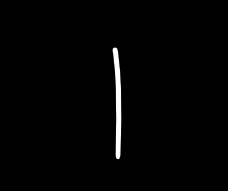

In [61]:
invert_img[0]

In [46]:
images = []
images.append(ImageOps.grayscale(image1))
images.append(ImageOps.grayscale(image2))
images.append(ImageOps.grayscale(image3))
images.append(ImageOps.grayscale(image4))
images.append(ImageOps.grayscale(image5))

In [62]:
for i in range(len(invert_img)):
    invert_img[i] = invert_img[i].resize((28,28))

In [64]:
invert_img[0]

In [68]:
invert_img[1]

In [71]:
invert_img[2]

In [73]:
invert_img[3]

In [74]:
invert_img[4]

In [80]:
img_arr = []
for i in range(len(invert_img)):
    img_arr.append((np.asarray(invert_img[i]))/255)

In [81]:
batch_size = 1
layers[0]['batch_size'] = batch_size

In [82]:
img_arr[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [83]:
my_pred = []
for i in range(len(img_arr)):

    cptest, P = convnet_forward(params, layers, img_arr[i], test=True)
    my_pred.append(P)

In [84]:
my_pred_val = []
# go through all the y_preds and get the index representing the predicted digit and store it
for i in range(len(my_pred)):
    my_pred_val.append(np.argmax(my_pred[i]))

In [85]:
print(my_pred_val)

[1, 3, 3, 4, 1]
